In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset
df = pd.read_csv('data_for_naive_bayes_algorithm/adult.csv')
print(df.head())

    

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [2]:
#Exploratary data analysis
##Now, I will explore the data to gain insights about the data.

print(df.shape)

#View summary of dataset
print(df.info())


(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [3]:
# Types of variables:
    # In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.

    # First of all, I will explore categorical variables.
    

#Explore categorical variables

# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print ('there are {} categorical variables\n'.format(len(categorical)))

print('the categorical variable are:\n\n',categorical )


#view the categorical variables 
print

there are 9 categorical variables

the categorical variable are:

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


<function print>

In [4]:
# view the categorical variables

print(df[categorical].head())

# Explore problems within categorical variables
# First, I will explore the categorical variables.

   workclass     education      marital-status         occupation  \
0    Private          11th       Never-married  Machine-op-inspct   
1    Private       HS-grad  Married-civ-spouse    Farming-fishing   
2  Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3    Private  Some-college  Married-civ-spouse  Machine-op-inspct   
4          ?  Some-college       Never-married                  ?   

  relationship   race  gender native-country income  
0    Own-child  Black    Male  United-States  <=50K  
1      Husband  White    Male  United-States  <=50K  
2      Husband  White    Male  United-States   >50K  
3      Husband  Black    Male  United-States   >50K  
4    Own-child  White  Female  United-States  <=50K  


In [5]:
#Missing values in categorical variables
# check missing values in categorical variables

df[categorical].isnull().sum()


workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [6]:
# Frequency counts of categorical variables
# Now, I will check the frequency counts of categorical variables.

# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())
    

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         561

In [7]:
# view frequency distribution of categorical variables
    
for var in categorical :
    print(df[var].value_counts()/np.float(len(df)))
    


Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64


In [8]:
#Explore workclass variable :

    #check labels in workclass variable
    
print(df.workclass.unique())
      

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [9]:
# check frequency distribution of values in workclass variable
df.workclass.value_counts()

#We can see that there are 2799 values encoded as ? in workclass variable. I will replace these ? with NaN.

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [10]:
#replace '?' values in workclass variable with NaN
df['workclass'].replace('?' , np.NaN , inplace = True)

#and again check the frequency distributin of values in workclass variable
print(df.workclass.value_counts())


Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [11]:
# Now, we can see that there are no values encoded as ? in the workclass variable.
# I will adopt similar approach with occupation and native_country column.

# Explore occupation variable
print(df.occupation.unique())
print('\n')

print(df.occupation.value_counts())#there are 2809 values coded as '?'
print(df['occupation'].replace('?', np.NaN , inplace = True))

print('\n\n')
#now we will check again the frequency distribution of values in workclass variable
print(df.occupation.value_counts())



['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64
None



Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv 

In [12]:
# Explore native-country variable
print(df['native-country'].unique())
print('\n')


print(df['native-country'].value_counts())#there are 857 values coded as '?'
print(df['native-country'].replace('?', np.NaN , inplace = True))

print('\n\n')
#now we will check again the frequency distribution of values in workclass variable
print(df['native-country'].value_counts())


['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                    

In [13]:
#Check missing values in categorical variables again

df[categorical].isnull().sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
native-country     857
income               0
dtype: int64

In [14]:
# Number of labels: cardinality
# The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

# check for cardinality in categorical variables

for var in categorical:
    
    print(var, 'contains', len(df[var].unique()), 'labels')

    #We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split

workclass contains 9 labels
education contains 16 labels
marital-status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
gender contains 2 labels
native-country contains 42 labels
income contains 2 labels


In [15]:
#Explore numerical variables 

#find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('ther are {} numerical variables\n'.format(len(numerical)))
print('the numerical variables are:', numerical)

ther are 6 numerical variables

the numerical variables are: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [16]:
# view the numerical variables
df[numerical]
# print('\n\n')
      
# print(df[numerical])

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [17]:
# Summary of numerical variables
# There are 6 numerical variables.
# These are given by age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
# All of the numerical variables are of discrete data type.
# Explore problems within numerical variables
# Now, I will explore the numerical variables.

#Missing values in numerical variables:

# check missing values in numerical variables

df[numerical].isnull().sum()

print(df[numerical].describe().T)

#We can see that all the 6 numerical variables do not contain missing values.

                   count           mean            std      min       25%  \
age              48842.0      38.643585      13.710510     17.0      28.0   
fnlwgt           48842.0  189664.134597  105604.025423  12285.0  117550.5   
educational-num  48842.0      10.078089       2.570973      1.0       9.0   
capital-gain     48842.0    1079.067626    7452.019058      0.0       0.0   
capital-loss     48842.0      87.502314     403.004552      0.0       0.0   
hours-per-week   48842.0      40.422382      12.391444      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178144.5  237642.0  1490400.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0  


In [18]:
#***Declare feature vector and target variable***
#Table of Contents
X = df.drop(['income'], axis=1)
y = df['income']


In [19]:
#split the dataset into training and test set
#table of contents

#splits x and y into training and test sets 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.3, random_state=0)
X_train.shape , X_test.shape


((34189, 14), (14653, 14))

In [20]:
##**** Feature Engineering****


# Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

# First, I will display the categorical and numerical variables again separately.

# check data types in X_train

X_train.dtypes


age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

In [21]:
#display categorical variables 

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [22]:
# display numerical variables

numerical = [col for col in X_train.columns if  X_train[col].dtypes!='O']
numerical

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [23]:
#Engineering missing value in categorical variables

#print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()


workclass         0.057211
education         0.000000
marital-status    0.000000
occupation        0.057358
relationship      0.000000
race              0.000000
gender            0.000000
native-country    0.017608
dtype: float64

In [24]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
    
        print(col, (X_train[col].isnull().mean()))
        
# impute missing categorical variables with most frequent value
    
    
for df2 in [X_train , X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode(),inplace= True)
    df2['occupation'].fillna(X_train['occupation'].mode(), inplace = True)
    df2['native-country'].fillna(X_train['native-country'].mode(), inplace = True)
    
# check missing values in categorical variables in X_train
print(X_train[categorical].isnull().sum())
print('\n\n')

# check missing values in categorical variables in X_test
print(X_test[categorical].isnull().sum())

workclass 0.05721138377840826
occupation 0.05735762964696247
native-country 0.017608002573927285
workclass         1956
education            0
marital-status       0
occupation        1961
relationship         0
race                 0
gender               0
native-country     602
dtype: int64



workclass         843
education           0
marital-status      0
occupation        848
relationship        0
race                0
gender              0
native-country    255
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
#As a final check, I will check for missing values in X_train and X_test.

# check missing values in X_train 
print(X_train.isnull().sum())

# check missing values in X_test

X_test.isnull().sum()
X_test["workclass"].unique()
print(X_test["native-country"].unique())

X_train["workclass"].unique()
X_train["native-country"].unique()
#We can see that there are no missing values in X_train and X_test

age                   0
workclass          1956
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1961
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      602
dtype: int64
['United-States' 'Portugal' nan 'Mexico' 'India' 'Iran' 'Yugoslavia'
 'Philippines' 'Haiti' 'Columbia' 'Puerto-Rico' 'France' 'Guatemala'
 'Canada' 'Greece' 'Dominican-Republic' 'England' 'South' 'El-Salvador'
 'Germany' 'Cuba' 'Vietnam' 'Honduras' 'Japan' 'Trinadad&Tobago' 'China'
 'Italy' 'Hungary' 'Taiwan' 'Jamaica' 'Ecuador' 'Poland' 'Hong'
 'Nicaragua' 'Scotland' 'Ireland' 'Outlying-US(Guam-USVI-etc)' 'Cambodia'
 'Peru' 'Thailand' 'Laos']


array(['United-States', 'Philippines', 'Mexico', 'Japan', 'Jamaica',
       'Vietnam', 'India', 'Puerto-Rico', nan, 'England', 'Guatemala',
       'China', 'Columbia', 'Italy', 'Haiti', 'Iran', 'Germany',
       'Nicaragua', 'Ecuador', 'Portugal', 'Cuba', 'Cambodia',
       'El-Salvador', 'Yugoslavia', 'Taiwan', 'South', 'Canada',
       'Thailand', 'Peru', 'Dominican-Republic', 'Poland',
       'Outlying-US(Guam-USVI-etc)', 'Trinadad&Tobago', 'Hong', 'Greece',
       'Laos', 'France', 'Honduras', 'Ireland', 'Scotland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [26]:
#Encode categorical variables
# print categorical variables


print(categorical)

print('\n\n')

print(X_train[categorical].head())

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']



              workclass     education      marital-status        occupation  \
3833          Local-gov  Some-college  Married-civ-spouse      Adm-clerical   
34743           Private          10th  Married-civ-spouse      Craft-repair   
2022   Self-emp-not-inc     Assoc-voc  Married-civ-spouse   Farming-fishing   
1580            Private  Some-college       Never-married   Exec-managerial   
4612            Private       HS-grad           Separated  Transport-moving   

        relationship   race  gender native-country  
3833       Own-child  White  Female  United-States  
34743      Own-child  Other    Male  United-States  
2022         Husband  White    Male  United-States  
1580   Not-in-family  White  Female  United-States  
4612       Unmarried  White  Female  United-States  


In [27]:
#import category encoders

import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder
#encode remaining variables with one- hot encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)
X_test.head()



,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
38113,36,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39214,57,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44248,49,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10283,54,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26724,17,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42
3833,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34743,42,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022,32,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,36,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4612,29,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,31,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45891,60,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42613,55,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43567,29,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train.shape, X_test.shape

((34189, 108), (14653, 107))

In [30]:

  
X_train, X_test = X_train.align(X_test, join='inner', axis=1)  # inner join

print(X_train.shape)
print(X_test.shape)

(34189, 107)
(14653, 107)


In [31]:
#*** Feature Scaling **
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test , columns=[cols])
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,-0.50,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.25,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34184,-0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34185,1.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34186,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34187,-0.40,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,-0.50,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.25,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34184,-0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34185,1.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34186,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34187,-0.40,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,-0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.052632,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.894737,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.052632,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14648,0.105263,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14649,0.526316,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14650,1.473684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14651,0.315789,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
##***Model training***
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model

gnb = GaussianNB()

# fit the model

gnb.fit(X_train,y_train)


#**** Predict the results ****

y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.8031


In [36]:
#****compare the train set and test set accuracy
#now , i will compare the train set and test set accuracy to check for overfitting

y_pred_train = gnb.predict(X_train)
y_pred_train
print('training set accuracy score :{0:0.4f}'.format(accuracy_score(y_train , y_pred_train)))

training set accuracy score :0.8002


In [37]:
#******check for overfitting and underfitting
#print the scores on training and test set

print('training set score:{:.4f}'.format(gnb.score(X_train,y_train)))
print('test set score:{:,.4f}'.format(gnb.score(X_test , y_test)))
#The training-set accuracy score is 0.8002 while the test-set accuracy to be 0.8031. These two values are quite comparable. So, there is no sign of overfitting.

training set score:0.8002
test set score:0.8031


In [38]:
# Compare model accuracy with null accuracy
# So, the model accuracy is 0.8031. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

# So, we should first check the class distribution in the test set.
y_test.value_counts()


<=50K    11138
>50K      3515
Name: income, dtype: int64

In [39]:
# We can see that the occurences of most frequent class is 11138. So, 
# we can calculate null accuracy by dividing 7407 by total number of occurences.

 #check null accuracy score
null_accuracy =(11138/(11138+3515))
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

# We can see that our model accuracy score is 0.8031 ,but null accuracy score is 0.76011. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.
# Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.
# But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.
# We have another tool called Confusion matrix that comes to our rescue.

Null accuracy score: 0.7601


confusion matrix is 

 [[10568   570]
 [ 2315  1200]]

true positive= 10568

 true nagetive= 1200

 false positive 570

 false nagetive 2315


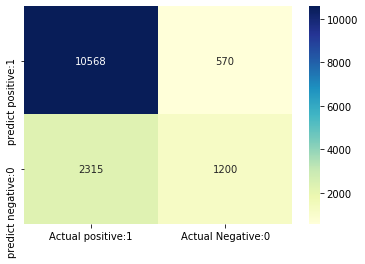

In [40]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)
print('confusion matrix is \n\n',cm)

print('\ntrue positive=',cm[0,0])
print('\n true nagetive=',cm[1,1])
print('\n false positive',cm[0,1])
print('\n false nagetive',cm[1,0])





cm_matrix = pd.DataFrame(data=cm , columns =['Actual positive:1','Actual Negative:0'],index=['predict positive:1','predict negative:0'])
sns.heatmap(cm_matrix , annot =True ,fmt='d', cmap='YlGnBu')


In [41]:
#**** Classification metrices ****

    #Classification report is another way to evaluate the classification model performance.

from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88     11138
        >50K       0.68      0.34      0.45      3515

    accuracy                           0.80     14653
   macro avg       0.75      0.65      0.67     14653
weighted avg       0.79      0.80      0.78     14653



In [42]:
#***classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP+TN) / float(TP + TN + FP +FN) 
print('classification accuracy: {0:0.4f}'.format(classification_accuracy))


#***Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


classification accuracy: 0.8031
Classification error : 0.1969


In [43]:
#****Precision
# Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

# So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

# Mathematically, precision can be defined as the ratio of TP to (TP + FP).

precision = TP/float(TP+FP)
print('precision : {0:0.4f}'.format(precision))

precision : 0.9488


In [44]:
#***Recall
# Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

# Recall identifies the proportion of correctly predicted actual positives.

# Mathematically, recall can be given as the ratio of TP to (TP + FN).

recall = TP / float(TP+FN)
print('recall :{0:0.4f}'.format(recall))

recall :0.8203


In [45]:
##***True Positive Rate
# True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)
print('true positive rate:{0:0.4f}'.format(true_positive_rate))


true positive rate:0.8203


In [46]:
#False Positive Rate
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


False Positive Rate : 0.3220


In [47]:
# ***Specificity
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

 

Specificity : 0.6780


In [48]:
# f1-score
# f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

# Support
# Support is the actual number of occurrences of the class in our dataset.

In [49]:
#*****calculate class probabilities*****
#print the first 10 predicted probabilities of two classes 0 and 1
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

# Observations
# In each row, the numbers sum to 1.
# There are 2 columns which correspond to 2 classes - <=50K and >50K.
# Class 0 => <=50K - Class that a person makes less than equal to 50K.
# Class 1 => >50K - Class that a person makes more than 50K.

# Importance of predicted probabilities

# We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
# predict_proba process
# Predicts the probabilities
# Choose the class with the highest probability
# Classification threshold level
# There is a classification threshold level of 0.5.

# Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.
# Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

array([[9.99547770e-01, 4.52230171e-04],
       [9.98739896e-01, 1.26010449e-03],
       [1.06493903e-01, 8.93506097e-01],
       [9.98573768e-01, 1.42623195e-03],
       [9.69222730e-01, 3.07772701e-02],
       [9.99977451e-01, 2.25485554e-05],
       [9.99912785e-01, 8.72152032e-05],
       [1.32081976e-06, 9.99998679e-01],
       [9.99932824e-01, 6.71763483e-05],
       [9.98083790e-01, 1.91620979e-03]])

In [50]:
#store the probabilities in dataframe 
y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['prob of - <=50K' , 'prob of - > 50K'])

y_pred_prob_df

,prob of - <=50K,prob of - > 50K
0,0.999548,0.000452
1,0.998740,0.001260
2,0.106494,0.893506
3,0.998574,0.001426
4,0.969223,0.030777
5,0.999977,0.000023
6,0.999913,0.000087
7,0.000001,0.999999
8,0.999933,0.000067
9,0.998084,0.001916


In [51]:
#print the first 10 predicted probabilities for class 1 probability of >50K
gnb.predict_proba(X_test)[0:10,1]


array([4.52230171e-04, 1.26010449e-03, 8.93506097e-01, 1.42623195e-03,
       3.07772701e-02, 2.25485554e-05, 8.72152032e-05, 9.99998679e-01,
       6.71763483e-05, 1.91620979e-03])

In [52]:

#store the predicted probabilities for class 1 probability of >50K
y_pred1 = gnb.predict_proba(X_test)[:,1]
print(y_pred1)

[4.52230171e-04 1.26010449e-03 8.93506097e-01 ... 2.47377150e-04
 7.56862715e-06 1.49723839e-04]


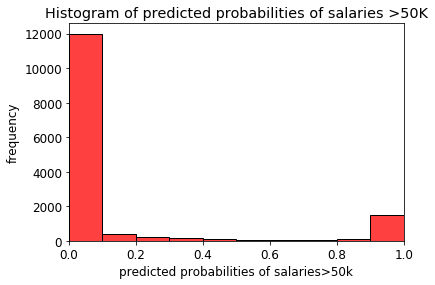

In [63]:
#plot histogram of predicted probabilities 
#adjust the font size
import seaborn as sns 
#adjust the font size 
plt.rcParams['font.size'] = 12
sns.histplot(data= y_pred1 ,color = 'red', bins =10)
 # set the x-axis limit
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlabel('predicted probabilities of salaries>50k')
plt.ylabel('frequency')
plt.show()


In [64]:
# observations:
# We can see that the above histogram is highly positive skewed.
# The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.
# There are relatively small number of observations with probability > 0.5.
# So, these small number of observations predict that the salaries will be >50K.
# Majority of observations predcit that the salaries will be <=50K.

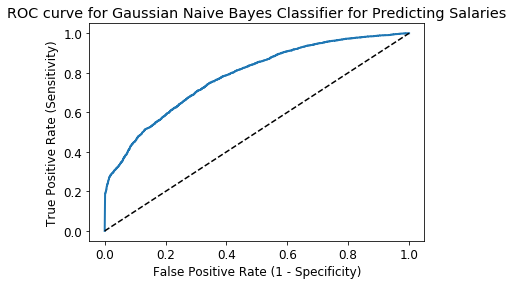

In [65]:
#******ROC - AUC*****
# ROC Curve
# Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.
# The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.
# True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).
# False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).
# In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()





In [67]:
# ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.
# ***ROC AUC***
# ROC AUC stands for Receiver Operating Characteristic - Area Under Curve.
#It is a technique to compare classifier performance. In this technique,
#we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1,
#whereas a purely random classifier will have a ROC AUC equal to 0.5.

# So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

# compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test , y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# Interpretation
# ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

# ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

ROC AUC : 0.7825


In [71]:
#****K-fold cross validation*****

#applying 10 fold cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb , X_train , y_train , cv=10 , scoring = 'accuracy')

print('cross validation scores:{}'.format(scores))

cross validation scores:[0.8016964  0.80111144 0.80374378 0.79964902 0.80930097 0.78239251
 0.80257385 0.79496929 0.79760164 0.80631949]


In [73]:
# we can summarize the cross validation accuracy by calculating its mean.
#compute Average cross validation score 

print('Average cross validation score:{:.4f}'.format(scores.mean()))

# Interpretation
# Using the mean cross-validation, we can conclude that we expect the model to be around 79.99% accurate on average.

# If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

# Our original model accuracy is 0.8083, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.


Average cross validation score:0.7999


In [ ]:
#****Results and conclusion*****
1: In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether
a person makes over 50K a year. The model yields a very good performance as indicated by
the model accuracy which was found to be 0.8031.

2: The training-set accuracy score is 0.8002 while the test-set accuracy to be 0.8031.
    These two values are quite comparable. So, there is no sign of overfitting.
   
3: I have compared the model accuracy score which is0.8031 with null accuracy 
    score which is 0.7601.So, we can conclude that our Gaussian Naïve Bayes 
    classifier model is doing a very good job in predicting the class labels.
    
4: ROC AUC of our model approaches towards 1. So, we can conclude that our 
    classifier does a very good job in predicting whether a person makes over 50K a year.
    
5: Using the mean cross-validation, we can conclude that we expect the model to be 
    around 79.99% accurate on average.
    
6: Our original model accuracy is 0.8031, but the mean cross-validation accuracy
    is 0.7999.So, the 10-fold cross-validation accuracy does not result in performance 
    improvement for this model.